In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('houses.csv')
# Shuffling the data
data = data.sample(frac=1)
data[['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
835,128000,1067
1005,149900,985
1087,252000,1953
1733,145000,1138
1728,133900,2291
...,...,...
630,124000,1750
968,37900,968
608,359100,3194
333,207000,1358


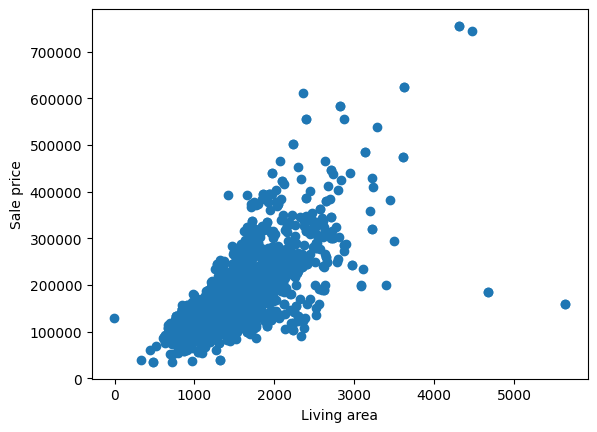

In [5]:
# Plot Living area vs Sale price
plt.scatter(data['GrLivArea'], data['SalePrice'])

# Labels
plt.xlabel("Living area")
plt.ylabel("Sale price")

plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [12]:
X = data[['GrLivArea']]
y = data.SalePrice # same as data['SalePrice']

In [9]:
model = LinearRegression()

In [13]:
model.fit(X, y)

LinearRegression()

In [15]:
model.coef_

array([105.00927564])

In [16]:
model.intercept_

22104.121010020695

In [17]:
model.score(X, y)

0.48960426399689105

In [19]:
# Predict on new data
new_data = pd.DataFrame({'GrLivArea': [1000, 2000]}) # or model.predict([[1000]])

model.predict(new_data)

array([127113.39664561, 232122.6722812 ])

In [21]:
y_pred = model.predict(X)

In [23]:
residuals = y_pred - y

### Holdout Method

In [25]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.5238940100510625

### Cross validation

In [87]:
from sklearn.model_selection import cross_validate

In [102]:
cv_results = cross_validate(LinearRegression(), X, y, cv=5)
cv_results['test_score'].mean()

0.46146094543616545

### Learning Curves

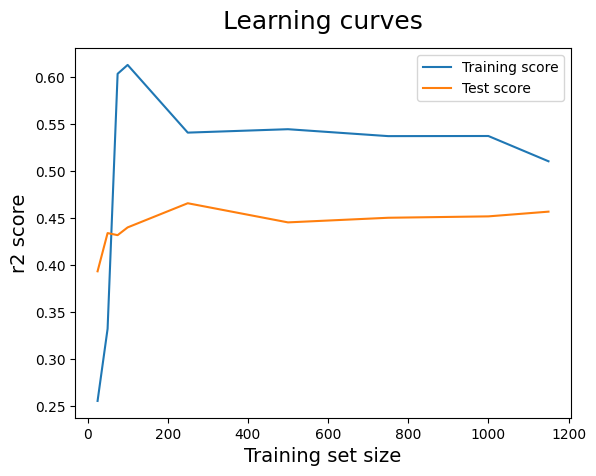

In [113]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()